In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(fishfood)

In [3]:
str(fishfood)

'data.frame':	33 obs. of  6 variables:
 $ Species: Factor w/ 33 levels "Brevoortia patronus",..: 1 2 5 12 13 14 19 20 21 22 ...
 $ MaxWt  : int  362 1216 28 2 1 2 8 10 11 13 ...
 $ Temp   : int  25 18 15 25 25 25 25 25 25 25 ...
 $ AR     : num  1.69 2.31 1.42 1.65 1.05 1.62 1.28 1.11 0.93 1.28 ...
 $ Food   : Factor w/ 2 levels "C","H": 1 2 1 1 1 1 1 1 1 1 ...
 $ FoodCon: num  2.22 8.61 2.5 9.28 6.66 3.32 10.3 4.45 3.28 7.38 ...


In [4]:
glm.1 <- glm(FoodCon ~ log(MaxWt) + log(Temp) + log(AR) + Food, data=fishfood, family = Gamma(link="log"))

In [5]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.3858216,0.96672172,-0.3991031,6.928450e-01
log(MaxWt),-0.2014974,0.03113332,-6.4720827,5.188109e-07
log(Temp),0.7032953,0.30121182,2.3348863,2.694522e-02
log(AR),0.5517909,0.19321383,2.8558561,7.998232e-03
FoodH,1.3894406,0.29738839,4.6721414,6.794819e-05


In [6]:
anova(glm.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,32,35.817086,NA,NA
log(MaxWt),1,11.878744,31,23.938342,51.91440,7.657889e-08
log(Temp),1,6.090441,30,17.847901,26.61742,1.794709e-05
log(AR),1,3.796060,29,14.051841,16.59015,3.453086e-04
Food,1,6.916194,28,7.135647,30.22626,7.125883e-06


In [7]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 0.9999771

[1] 0.9999929

[1] 0.2548446

[1] 0.2288141


	Shapiro-Wilk normality test

data:  qr1
W = 0.97599, p-value = 0.6606


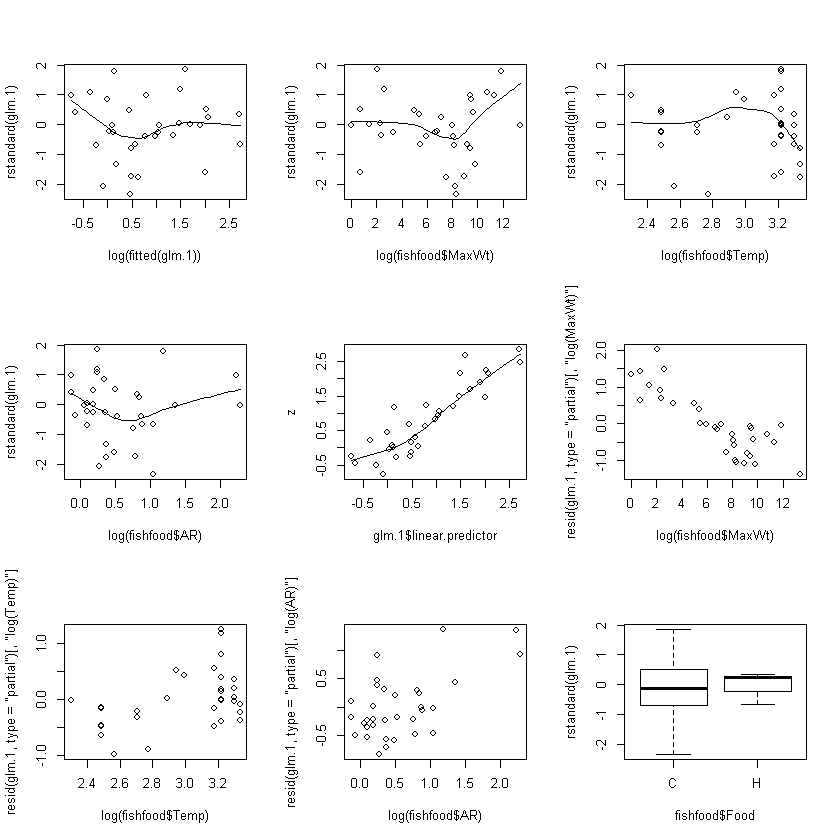

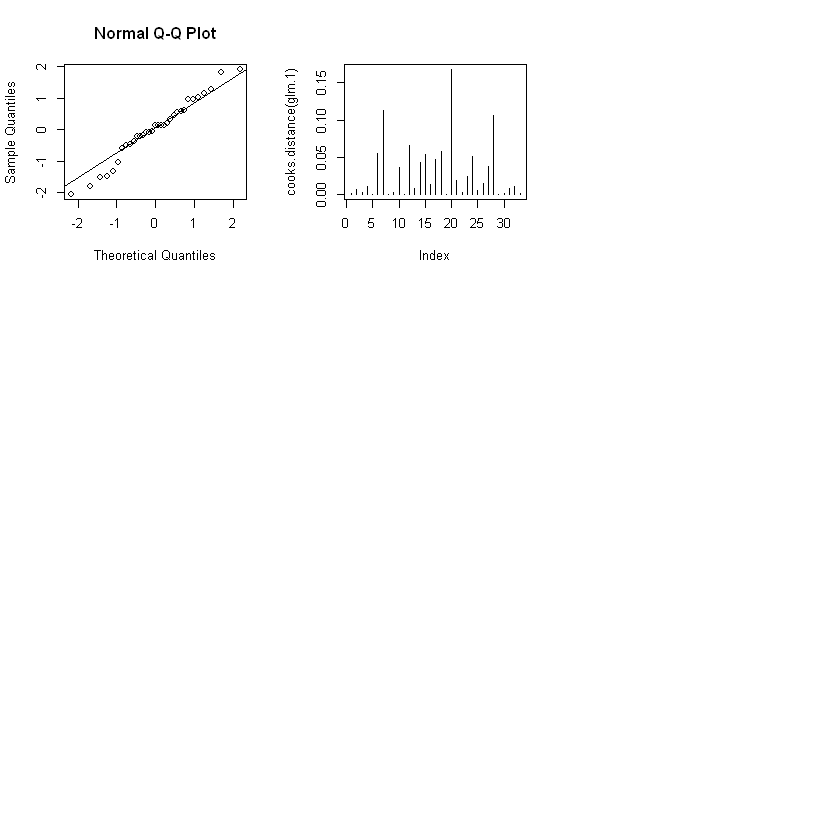

In [14]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ log(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ log(fishfood$MaxWt))
scatter.smooth(rstandard(glm.1) ~ log(fishfood$Temp))
scatter.smooth(rstandard(glm.1) ~ log(fishfood$AR))
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
plot(resid(glm.1, type="partial")[,"log(MaxWt)"]~log(fishfood$MaxWt))
plot(resid(glm.1, type="partial")[,"log(Temp)"]~log(fishfood$Temp))
plot(resid(glm.1, type="partial")[,"log(AR)"]~log(fishfood$AR))
#termplot(glm.1, partial.resid = TRUE, terms="log(MaxWt)")
#termplot(glm.1, partial.resid = TRUE, terms="log(Temp)")
#termplot(glm.1, partial.resid = TRUE, terms="log(AR)")
plot(rstandard(glm.1) ~ fishfood$Food)
qqnorm(qr1 <- qresid(glm.1))
qqline(qr1)
plot(cooks.distance(glm.1), type="h")
shapiro.test(qr1)

In [10]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_ dfb.l(MW dfb.l(T) dfb.l(AR dfb.FodH    dffit    cov.r   cook.d 
       0        0        0        0        0        0        4        0 
     hat 
       0